In [1]:
#Generate a linear-like distribution & fit

import numpy as np
import matplotlib.pyplot as plt

x=np.random.rand(100,1)
y = 6+np.random.rand(100,1) + 2*x 

plt.scatter(x,y)
plt.show()


<Figure size 640x480 with 1 Axes>

In [2]:
#Compute best estimates of the parameters, offset and slope
#Here X_b has first column as a collection of 1s because x_0
# is 1. Basically, Y = c + mx or Y = (c m).X_b

X_b = np.c_[np.ones((100,1)), x]
#print(X_b)
print("\n")
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Best estimates (computed) for intercept and slope are:")
print(theta_best)



Best estimates (computed) for intercept and slope are:
[[6.50077901]
 [1.96405484]]


In [3]:
#What we did above is performed by sklearn behind-the-scenes. 
# Here are the sklearn commands to find the best estimates

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x,y)

#print the best estimates for the fit coefficients
lin_reg.intercept_, lin_reg.coef_

(array([6.50077901]), array([[1.96405484]]))

norm of initialized gradient =  1.4142135623730951


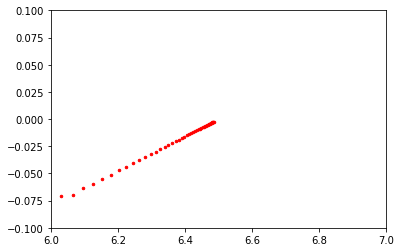



[[6.485553  ]
 [1.99119638]]


In [45]:
#Gradient descent

from numpy import linalg as la

eta = 0.5 #step size or learning rate
m = 100 #number of instances or row entries

theta = np.random.randn(2,1) #random initialization of 
                       #the two coefficients

gradients = np.array([1,1])
e = 0.005 #tolerance
print("norm of initialized gradient = ",la.norm(gradients))
while la.norm(gradients) > e:
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    #print("gradient = ", gradients)
    theta = theta - eta*gradients
    #print(theta[0], gradients[0])
    plt.plot(theta[0], gradients[0], 'r.', ms=5)
    
plt.xlim([6,7]); plt.ylim([-0.1,0.1])
plt.show()
print("\n")
print(theta)